In [ ]:
import numpy as np
import contractions
import pandas as pd
from tqdm import tqdm
import string
import nltk
from nltk.corpus import stopwords

ignore_articles = stopwords.words('english')
sim_holder = "../../datasets/VQA/back-translate/sim-result2/rep_{}_{}.npy"
thresh_values = [0.7]
decontract_depunctuate = [(True, False), (False, False)]
df = pd.DataFrame(columns=["question_id"])

for th_value in thresh_values:
    for decon, depun in decontract_depunctuate:
        key = f"unique-thresh-{th_value}-decontract-{decon}-depun-{depun}"

        # add a new column
        df[key] = None

        for split in ["val"]:
            for seq_id in range(1):
                file_path = sim_holder.format(split, seq_id)
                file_data = np.load(file_path, allow_pickle=True).item()

                for qid, value in tqdm(list(file_data.items())):
                    filtered_questions = []
                    for rep in value["rephrasings_list"]:
                        if rep["sim_score"] > th_value:
                            question = rep["rephrasing"]
                            if decon:
                                question = contractions.fix(question)
                            
                            question = question.lower()
                            
                            if depun:
                                question = "".join([char for char in question if char not in string.punctuation])
                                question = " ".join([word for word in question.split(" ") if word not in ignore_articles])
                                
                            
                            # Todo add preprocessing
                            filtered_questions.append(question)
                    
                    import pdb
                    pdb.set_trace()
                    
                    if len(df[df['question_id'] == qid]) > 0:
                        df.loc[df["question_id"] == qid, key] = len(set(filtered_questions))
                    else:
                        df = df.append({"question_id": qid, key: len(set(filtered_questions))}, ignore_index=True)












  0%|          | 0/21436 [00:00<?, ?it/s]

> <ipython-input-44-34a190e946c7>(48)<module>()
-> if len(df[df['question_id'] == qid]) > 0:
(Pdb) set(filtered_questions)
{'where is he?', 'how does he view himself?', 'where did he search for it?', 'where is he looking for?', 'where did he want it?', 'where do you search for it?', 'where is he looking?', 'where does he see?', 'where did he see it?', 'where are they looking?', 'where does he search?', 'where?', 'where did he watch?', 'where does he look?', 'where do you look?', 'where does he find it?', 'where did he look?', 'where are you looking for?', 'where did he see?', 'where is he going?', 'where is he seeking?', 'where is it?', 'where are you looking?', 'what is he looking for?', 'what is he looking at?', 'where is he watching?'}
(Pdb) rep["rephrasing"]
'How does he view himself?'


In [42]:
df

,question_id,unique-thresh-0.7-decontract-True-depun-True,unique-thresh-0.7-decontract-True-depun-False,unique-thresh-0.7-decontract-False-depun-False
0,262148000,12,26,27
1,262148001,2,13,13
2,262148002,3,19,22
3,393225000,21,25,25
4,393225001,5,13,13
...,...,...,...,...
21431,536000002,12,13,13
21432,536000003,8,11,11
21433,404931000,23,34,34
21434,404931001,17,25,25


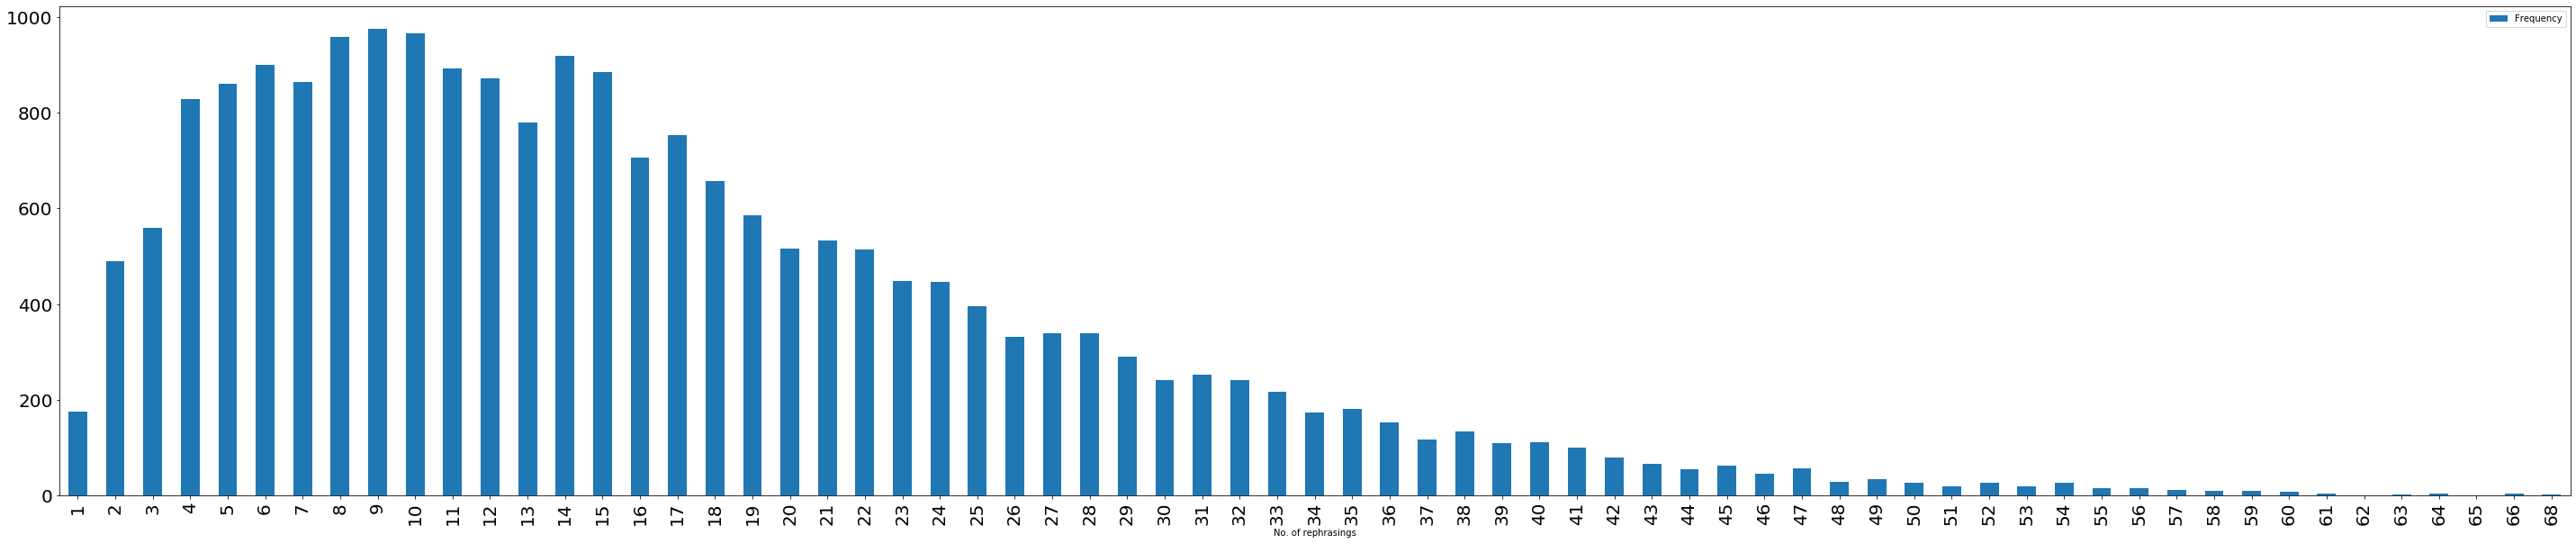

In [39]:
from collections import Counter
counter = dict( Counter(df["unique-thresh-0.7-decontract-True-depun-True"]))
ditems = counter.items()
sorted_items = sorted(ditems, key=lambda x: x[0])
num_rephrasings, freqs = zip(*sorted_items)
plt_df = pd.DataFrame({'No. of rephrasings':num_rephrasings, 'Frequency':freqs})
ax = plt_df.plot.bar(y='Frequency', x='No. of rephrasings', rot=90,
                     figsize=[50, 10], fontsize=20)


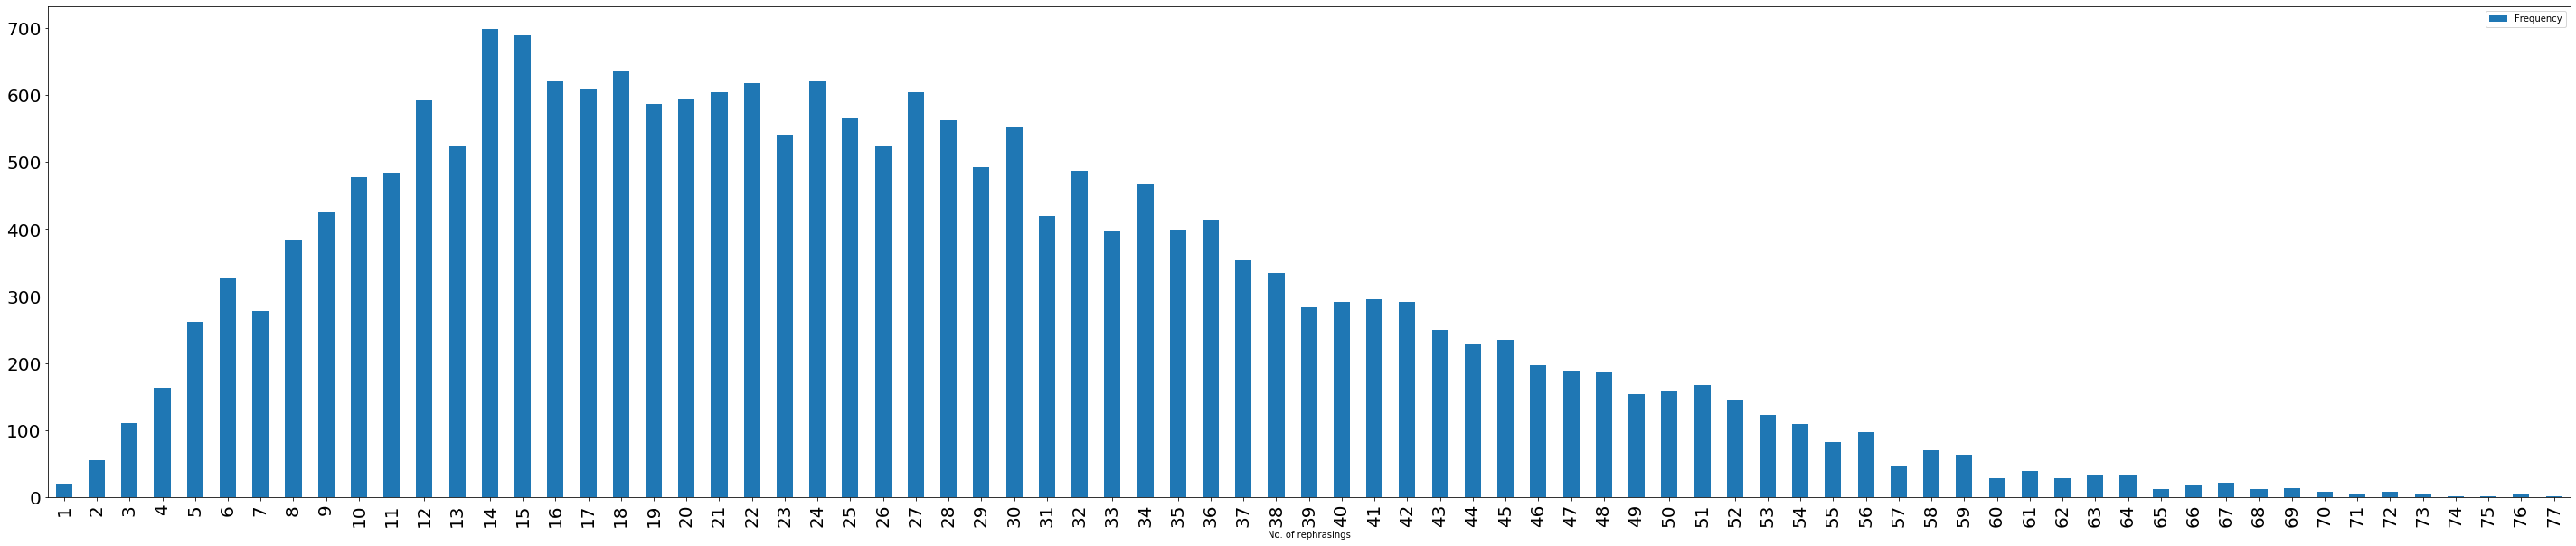

In [40]:
from collections import Counter
counter = dict( Counter(df["unique-thresh-0.7-decontract-True-depun-False"]))
ditems = counter.items()
sorted_items = sorted(ditems, key=lambda x: x[0])
num_rephrasings, freqs = zip(*sorted_items)
plt_df = pd.DataFrame({'No. of rephrasings':num_rephrasings, 'Frequency':freqs})
ax = plt_df.plot.bar(y='Frequency', x='No. of rephrasings', rot=90,
                     figsize=[50, 10], fontsize=20)


-0.25699757417428626

In [ ]:
all(df["unique-thresh-0.95-decontract-True"] == df["unique-thresh-0.95-decontract-False"])